# 1. Import Assets

In [1]:
import yfinance as yf
import numpy as np
import pandas as df

# 2. Download Stocks Data

In [2]:
# Download dat of the S&P 500 (ticker: GSPC)
df = yf.download('^GSPC', start='2010-10-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
# create a column with the daily retuns
df['return'] = (np
.log( # We use log returns
    df['Close'].pct_change() # Percentage change between the current and a prior element
    + 1
    )
)

In [4]:
# Create function to create columns with shifted returns
def lagit(df, lags):
    names = []
    for i in range(1, lags + 1):
        df['Lag_'+str(i)] = df['return'].shift(i) # Shift index by i periods
        names.append('Lag_'+str(i))
    return names

In [5]:
 lagnames = lagit(df, 5)

In [6]:
lagnames

['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']

In [7]:
df.head().T

Date,2010-10-01,2010-10-04,2010-10-05,2010-10-06,2010-10-07
Open,1.143490e+03,1.144960e+03,1.140680e+03,1.159810e+03,1.161570e+03
High,1.150300e+03,1.148160e+03,1.162760e+03,1.162330e+03,1.163870e+03
Low,1.139420e+03,1.131870e+03,1.140680e+03,1.154850e+03,1.151410e+03
Close,1.146240e+03,1.137030e+03,1.160750e+03,1.159970e+03,1.158060e+03
Adj Close,1.146240e+03,1.137030e+03,1.160750e+03,1.159970e+03,1.158060e+03
Volume,4.298910e+09,3.604110e+09,4.068840e+09,4.073160e+09,3.910550e+09
return,NaN,-8.067387e-03,2.064672e-02,-6.722305e-04,-1.647876e-03
Lag_1,NaN,NaN,-8.067387e-03,2.064672e-02,-6.722305e-04
Lag_2,NaN,NaN,NaN,-8.067387e-03,2.064672e-02
Lag_3,NaN,NaN,NaN,NaN,-8.067387e-03


In [8]:
# drop columns with nan values to have complete model data
df.dropna(inplace=True)

# check
df.head().T

Date,2010-10-11,2010-10-12,2010-10-13,2010-10-14,2010-10-15
Open,1.165320e+03,1.164280e+03,1.171320e+03,1.177820e+03,1.177470e+03
High,1.168680e+03,1.172580e+03,1.184380e+03,1.178890e+03,1.181200e+03
Low,1.162020e+03,1.155710e+03,1.171320e+03,1.166710e+03,1.167120e+03
Close,1.165320e+03,1.169770e+03,1.178100e+03,1.173810e+03,1.176190e+03
Adj Close,1.165320e+03,1.169770e+03,1.178100e+03,1.173810e+03,1.176190e+03
Volume,2.505900e+09,4.076170e+09,4.969410e+09,4.969410e+09,5.724910e+09
return,1.458263e-04,3.811484e-03,7.095786e-03,-3.648032e-03,2.025433e-03
Lag_1,6.103613e-03,1.458263e-04,3.811484e-03,7.095786e-03,-3.648032e-03
Lag_2,-1.647876e-03,6.103613e-03,1.458263e-04,3.811484e-03,7.095786e-03
Lag_3,-6.722305e-04,-1.647876e-03,6.103613e-03,1.458263e-04,3.811484e-03


# 3. Linear Regression Model

In [9]:
from sklearn.linear_model import  LinearRegression

In [10]:
model = LinearRegression()

In [11]:
# Find the best line to fit the model
(model
.fit(
    X=df[lagnames], # used the shifted returns as independent variable
    y=df['return'] # predict the returns
    )
)

LinearRegression()

In [12]:
# Create column with the predicted return
df['prediction_LR'] = model.predict(X=df[lagnames]) # Predict using the linear model

In [13]:
df.head().T

Date,2010-10-11,2010-10-12,2010-10-13,2010-10-14,2010-10-15
Open,1.165320e+03,1.164280e+03,1.171320e+03,1.177820e+03,1.177470e+03
High,1.168680e+03,1.172580e+03,1.184380e+03,1.178890e+03,1.181200e+03
Low,1.162020e+03,1.155710e+03,1.171320e+03,1.166710e+03,1.167120e+03
Close,1.165320e+03,1.169770e+03,1.178100e+03,1.173810e+03,1.176190e+03
Adj Close,1.165320e+03,1.169770e+03,1.178100e+03,1.173810e+03,1.176190e+03
Volume,2.505900e+09,4.076170e+09,4.969410e+09,4.969410e+09,5.724910e+09
return,1.458263e-04,3.811484e-03,7.095786e-03,-3.648032e-03,2.025433e-03
Lag_1,6.103613e-03,1.458263e-04,3.811484e-03,7.095786e-03,-3.648032e-03
Lag_2,-1.647876e-03,6.103613e-03,1.458263e-04,3.811484e-03,7.095786e-03
Lag_3,-6.722305e-04,-1.647876e-03,6.103613e-03,1.458263e-04,3.811484e-03


In [14]:
# if predction is > 0 we want to buy
# if < 0 we want to sell

df['direction_LR'] = [1 if i > 0 else -1 for i in df['prediction_LR']]

In [15]:
df['strategy_LR'] = df['direction_LR'] * df['return']

In [16]:
df.head().T

Date,2010-10-11,2010-10-12,2010-10-13,2010-10-14,2010-10-15
Open,1.165320e+03,1.164280e+03,1.171320e+03,1.177820e+03,1.177470e+03
High,1.168680e+03,1.172580e+03,1.184380e+03,1.178890e+03,1.181200e+03
Low,1.162020e+03,1.155710e+03,1.171320e+03,1.166710e+03,1.167120e+03
Close,1.165320e+03,1.169770e+03,1.178100e+03,1.173810e+03,1.176190e+03
Adj Close,1.165320e+03,1.169770e+03,1.178100e+03,1.173810e+03,1.176190e+03
Volume,2.505900e+09,4.076170e+09,4.969410e+09,4.969410e+09,5.724910e+09
return,1.458263e-04,3.811484e-03,7.095786e-03,-3.648032e-03,2.025433e-03
Lag_1,6.103613e-03,1.458263e-04,3.811484e-03,7.095786e-03,-3.648032e-03
Lag_2,-1.647876e-03,6.103613e-03,1.458263e-04,3.811484e-03,7.095786e-03
Lag_3,-6.722305e-04,-1.647876e-03,6.103613e-03,1.458263e-04,3.811484e-03


In [17]:
# Cumulative return of the startegy
np.exp(df[['return', 'strategy_LR']].sum())

return         3.810033
strategy_LR    7.442976
dtype: float64

<AxesSubplot:xlabel='Date'>

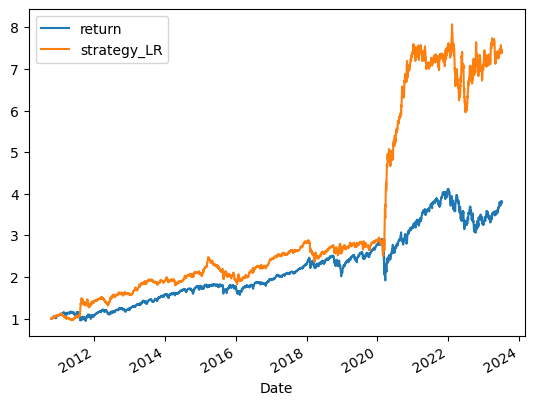

In [18]:
# chart the cumulative returns vs cumulative strategy
np.exp(df[['return', 'strategy_LR']].cumsum()).plot()

# 4. ML Model

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# define train and test data sets

train, test = (train_test_split(
    df,
    shuffle=False,
    test_size=0.3,
    random_state=0
    )
    )

In [22]:
train.head().T

Date,2010-10-11,2010-10-12,2010-10-13,2010-10-14,2010-10-15
Open,1.165320e+03,1.164280e+03,1.171320e+03,1.177820e+03,1.177470e+03
High,1.168680e+03,1.172580e+03,1.184380e+03,1.178890e+03,1.181200e+03
Low,1.162020e+03,1.155710e+03,1.171320e+03,1.166710e+03,1.167120e+03
Close,1.165320e+03,1.169770e+03,1.178100e+03,1.173810e+03,1.176190e+03
Adj Close,1.165320e+03,1.169770e+03,1.178100e+03,1.173810e+03,1.176190e+03
Volume,2.505900e+09,4.076170e+09,4.969410e+09,4.969410e+09,5.724910e+09
return,1.458263e-04,3.811484e-03,7.095786e-03,-3.648032e-03,2.025433e-03
Lag_1,6.103613e-03,1.458263e-04,3.811484e-03,7.095786e-03,-3.648032e-03
Lag_2,-1.647876e-03,6.103613e-03,1.458263e-04,3.811484e-03,7.095786e-03
Lag_3,-6.722305e-04,-1.647876e-03,6.103613e-03,1.458263e-04,3.811484e-03


In [23]:
test.head().T

Date,2019-09-12,2019-09-13,2019-09-16,2019-09-17,2019-09-18
Open,3.009080e+03,3.012210e+03,2.996410e+03,2.995670e+03,3.001500e+03
High,3.020740e+03,3.017330e+03,3.002190e+03,3.006210e+03,3.007830e+03
Low,3.000920e+03,3.002900e+03,2.990670e+03,2.993730e+03,2.978570e+03
Close,3.009570e+03,3.007390e+03,2.997960e+03,3.005700e+03,3.006730e+03
Adj Close,3.009570e+03,3.007390e+03,2.997960e+03,3.005700e+03,3.006730e+03
Volume,3.796990e+09,3.557010e+09,4.285860e+09,3.673250e+09,3.458800e+09
return,2.875016e-03,-7.246769e-04,-3.140513e-03,2.578425e-03,3.426333e-04
Lag_1,7.203672e-03,2.875016e-03,-7.246769e-04,-3.140513e-03,2.578425e-03
Lag_2,3.222524e-04,7.203672e-03,2.875016e-03,-7.246769e-04,-3.140513e-03
Lag_3,-9.401468e-05,3.222524e-04,7.203672e-03,2.875016e-03,-7.246769e-04


In [24]:
model = LinearRegression()

In [26]:
model.fit(X=train[lagnames], y=train['return'])

LinearRegression()

In [29]:
test['Prediction_LR2'] = model.predict(test[lagnames])

In [32]:
# if predction is > 0 we want to buy
# if < 0 we want to sell

test['Direction_LR2'] = [1 if i > 0 else -1 for i in test['Prediction_LR2']]

In [34]:
test['Strategy_LR2'] = test['Direction_LR2'] * test['return']

In [36]:
# Cumulative return of the startegy
np.exp(test[['return', 'Strategy_LR2']].sum())

return          1.479295
Strategy_LR2    1.951392
dtype: float64

<AxesSubplot:xlabel='Date'>

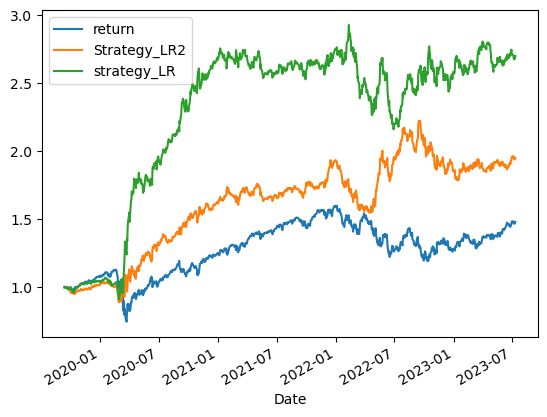

In [38]:
# chart the cumulative returns vs cumulative strategy
np.exp(test[['return', 'Strategy_LR2', 'strategy_LR']].cumsum()).plot()